# Import Packages and Data set

In [1]:
# EDA - Data Cleaning
import pandas as pd
import numpy as np
import missingno
from collections import Counter
import math

# EDA - Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

#Modeling
from sklearn import (datasets,
                     metrics,
                     model_selection as skms,
                     naive_bayes,
                     neighbors)

from sklearn.linear_model import (LogisticRegression)

from sklearn.model_selection import (cross_val_score,
                                     cross_val_predict,
                                     train_test_split,
                                     GridSearchCV)
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             confusion_matrix,
                             f1_score,
                             roc_curve,
                             auc,
                             classification_report,
                             precision_recall_curve)

from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor


# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# logistic regression model
import statsmodels.api as sm 

pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

pd.options.display.float_format = '{:.2f}'.format

# Define Functions

In [2]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("Initial Accuracy Score:  {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))),'-'*40)
            
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n") 
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test)))) 
        print("Initial Accuracy Score:  {0:.4f}".format(accuracy_score(y_test, clf.predict(X_test))))

# Import Dataset

In [3]:
df = pd.read_csv('capstone_modeling.csv')

# Review Dependant Variable Split (DV)

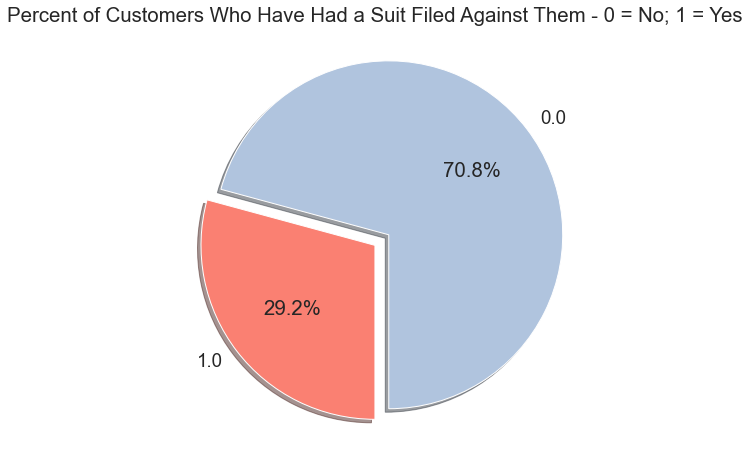

In [4]:
# Data to plot for the % of target variable
sns.set(font_scale = 1.7)
labels =df['suitflag'].value_counts(sort = True).index
sizes = df['suitflag'].value_counts(sort = True)
colors = ["lightsteelblue","salmon"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percent of Customers Who Have Had a Suit Filed Against Them - 0 = No; 1 = Yes')
plt.show()

# Logistic Regression - Initial Run

## Generate Dummy Variables

In [5]:
df

,GIC_Industry,GIC_SubIndustry,suitflag,idbflag,stko,restatementflag,Vol_roe_Variance,Vol_capx_Variance,Vol_cogs_Variance,Vol_cshfd_Variance,Vol_dltt_Variance,Vol_dp_Variance,Vol_emp_Variance,Vol_epspi_Variance,Vol_ni_Variance,Vol_ppent_Variance,Vol_sale_Variance,Vol_teq_Variance,Vol_txt_Variance,Vol_wcap_Variance,Vol_xint_Variance,Vol_xsga_Variance,Vol_roa_Variance,STD_at,StdDev_capx,StdDev_cogs,StdDev_cshfd,StdDev_dltt,StdDev_dp,StdDev_emp,StdDev_epspi,StdDev_ni,StdDev_ppent,StdDev_sale,StdDev_teq,StdDev_txt,StdDev_wcap,STD_xido,StdDev_xint,StdDev_xsga,StdDev_roa,StdDev_roe
0,Aeorspace & Defense,Aerospace & Defense,1.00,D,0,1,0.03,0.09,0.10,0.10,0.12,0.07,1.42,0.11,0.07,0.09,0.00,0.09,0.08,0.12,0.07,0.08,0.08,0.03,0.15,0.14,0.14,0.34,0.19,0.25,0.13,0.52,0.04,0.08,0.37,0.26,0.38,0.14,0.07,0.09,0.13,0.26
1,Industrial Congolomerates,Industrial Conglomerates,1.00,B,3,0,0.03,0.09,0.10,0.10,0.07,0.07,0.36,0.11,0.07,0.09,0.00,0.09,0.08,0.12,0.07,0.08,0.08,0.84,1.92,2.89,0.14,0.17,3.00,0.32,0.05,2.65,1.21,3.00,0.98,0.65,1.36,0.32,0.03,3.00,0.13,0.27
2,Machinery,Construction & Farm Machinery & Heavy Trucks,1.00,D,0,1,0.03,0.08,0.08,0.10,0.11,0.06,0.63,0.11,0.07,0.09,0.09,0.09,0.05,0.12,0.07,0.07,0.08,0.07,0.64,0.13,0.28,0.02,0.16,0.49,0.13,0.14,0.43,0.16,0.04,0.06,0.38,0.17,0.11,0.13,0.13,0.27
3,Aeorspace & Defense,Aerospace & Defense,1.00,D,0,1,0.03,0.08,2.37,0.10,0.07,0.05,3.00,0.11,0.07,0.10,0.78,0.11,0.80,0.11,0.04,0.02,0.08,0.02,0.19,0.48,0.13,0.06,0.11,1.26,0.26,0.02,0.13,0.43,0.23,0.15,0.28,0.05,0.08,0.23,0.13,0.27
4,Electrical Equipment,Electrical Components & Equipment,1.00,D,0,1,0.07,0.08,0.09,0.07,0.07,0.07,0.34,3.00,0.19,0.08,0.04,0.07,0.08,0.09,0.07,0.07,0.26,0.22,0.24,0.29,0.13,0.18,0.29,0.32,0.29,0.35,0.26,0.30,0.34,0.25,0.34,0.14,0.13,0.28,0.11,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,Aeorspace & Defense,Aerospace & Defense,0.00,D,0,1,0.03,0.09,0.10,0.10,0.07,0.07,0.35,0.11,0.07,0.09,0.00,0.09,0.08,0.11,0.07,0.08,0.08,0.23,0.24,0.31,0.29,0.18,0.29,0.36,0.22,0.39,0.26,0.32,0.36,0.25,0.37,0.20,0.13,0.28,0.12,0.24
174,Construction & Engineering,Construction & Engineering,0.00,D,0,1,0.03,0.09,0.10,0.10,0.07,0.07,0.28,0.10,0.07,0.09,0.00,0.09,0.08,0.12,0.07,0.08,0.07,0.23,0.21,0.29,0.29,0.18,0.27,0.32,0.19,0.33,0.25,0.29,0.35,0.22,0.35,0.20,0.13,0.28,0.12,0.27
175,Electrical Equipment,Electrical Components & Equipment,0.00,D,3,1,0.03,0.09,0.10,0.54,0.07,0.07,0.36,0.30,0.07,0.09,0.00,0.09,0.08,0.12,0.07,0.08,0.08,0.23,0.25,0.31,0.35,0.18,0.29,0.35,0.17,0.38,0.26,0.32,0.36,0.25,0.37,0.20,0.13,0.28,0.21,0.13
176,Aeorspace & Defense,Aerospace & Defense,0.00,D,3,1,0.03,0.09,0.10,0.10,0.07,0.07,0.36,0.11,0.07,0.09,0.00,0.09,0.08,0.12,0.07,0.08,0.08,0.23,0.24,0.31,0.26,0.18,0.28,0.36,0.30,0.37,0.26,0.31,0.36,0.23,0.37,0.20,0.13,0.28,0.12,0.25


In [6]:
cols = ['stko', 'restatementflag']

for ea in range(len(cols)):
    df[cols[ea]] = df[cols[ea]].astype(str)

In [7]:
binary_cols=[]
multi_Value=[]
for col in df.columns:
    if df[col].dtype =='object':
        if df[col].unique().shape[0]==2:
            binary_cols.append(col)
        else:
            multi_Value.append(col)
            
print('Multi-value columns include: ',multi_Value)
print('Binary-value columns include: ',binary_cols)

Multi-value columns include:  ['GIC_Industry', 'GIC_SubIndustry', 'stko']
Binary-value columns include:  ['idbflag', 'restatementflag']


In [8]:
for col in df.dtypes[df.dtypes == object].index:
    print(col,'\n', df[col].unique())

GIC_Industry 
 ['Aeorspace & Defense' 'Industrial Congolomerates' 'Machinery'
 'Electrical Equipment' 'Construction & Engineering']
GIC_SubIndustry 
 ['Aerospace & Defense' 'Industrial Conglomerates'
 'Construction & Farm Machinery & Heavy Trucks'
 'Electrical Components & Equipment' 'Industrial Machinary'
 'Heavy Electrical Equipment' 'Construction & Engineering'
 'Agricultural & Farm Machinery']
idbflag 
 ['D' 'B']
stko 
 ['0' '3' '2']
restatementflag 
 ['1' '0']


In [9]:
# Convert IDBflag, with Foreign_and_Domestic_indicator (1 = yes; 0 = no)
df['Foreign_and_Domestic_indicator'] = df['idbflag'].replace({'D':0, 'B':1})
df.drop(columns='idbflag', inplace=True)

In [10]:
GIC_Industry = pd.get_dummies(df['GIC_Industry'], prefix='GIC_Industry').drop(columns=['GIC_Industry_Industrial Congolomerates'])
df1 = df.join(GIC_Industry)

GIC_SubIndustry = pd.get_dummies(df['GIC_SubIndustry'], prefix='GIC_SubIndustry').drop(columns=['GIC_SubIndustry_Industrial Conglomerates'])
df1 = df1.join(GIC_SubIndustry)

stko = pd.get_dummies(df['stko'], prefix='stko').drop(columns=['stko_0'])
df1 = df1.join(stko)

In [11]:
df1.head(3).T

,0,1,2
GIC_Industry,Aeorspace & Defense,Industrial Congolomerates,Machinery
GIC_SubIndustry,Aerospace & Defense,Industrial Conglomerates,Construction & Farm Machinery & Heavy Trucks
suitflag,1.00,1.00,1.00
stko,0,3,0
restatementflag,1,0,1
Vol_roe_Variance,0.03,0.03,0.03
Vol_capx_Variance,0.09,0.09,0.08
Vol_cogs_Variance,0.10,0.10,0.08
Vol_cshfd_Variance,0.10,0.10,0.10
Vol_dltt_Variance,0.12,0.07,0.11


In [12]:
#Dropping columns due to dummy variable additions
df2 = df1.drop(columns=['GIC_Industry', 
                        'GIC_SubIndustry', 
                        'stko'
                       ])

In [13]:
df2

,suitflag,restatementflag,Vol_roe_Variance,Vol_capx_Variance,Vol_cogs_Variance,Vol_cshfd_Variance,Vol_dltt_Variance,Vol_dp_Variance,Vol_emp_Variance,Vol_epspi_Variance,Vol_ni_Variance,Vol_ppent_Variance,Vol_sale_Variance,Vol_teq_Variance,Vol_txt_Variance,Vol_wcap_Variance,Vol_xint_Variance,Vol_xsga_Variance,Vol_roa_Variance,STD_at,StdDev_capx,StdDev_cogs,StdDev_cshfd,StdDev_dltt,StdDev_dp,StdDev_emp,StdDev_epspi,StdDev_ni,StdDev_ppent,StdDev_sale,StdDev_teq,StdDev_txt,StdDev_wcap,STD_xido,StdDev_xint,StdDev_xsga,StdDev_roa,StdDev_roe,Foreign_and_Domestic_indicator,GIC_Industry_Aeorspace & Defense,GIC_Industry_Construction & Engineering,GIC_Industry_Electrical Equipment,GIC_Industry_Machinery,GIC_SubIndustry_Aerospace & Defense,GIC_SubIndustry_Agricultural & Farm Machinery,GIC_SubIndustry_Construction & Engineering,GIC_SubIndustry_Construction & Farm Machinery & Heavy Trucks,GIC_SubIndustry_Electrical Components & Equipment,GIC_SubIndustry_Heavy Electrical Equipment,GIC_SubIndustry_Industrial Machinary,stko_2,stko_3
0,1.00,1,0.03,0.09,0.10,0.10,0.12,0.07,1.42,0.11,0.07,0.09,0.00,0.09,0.08,0.12,0.07,0.08,0.08,0.03,0.15,0.14,0.14,0.34,0.19,0.25,0.13,0.52,0.04,0.08,0.37,0.26,0.38,0.14,0.07,0.09,0.13,0.26,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,1.00,0,0.03,0.09,0.10,0.10,0.07,0.07,0.36,0.11,0.07,0.09,0.00,0.09,0.08,0.12,0.07,0.08,0.08,0.84,1.92,2.89,0.14,0.17,3.00,0.32,0.05,2.65,1.21,3.00,0.98,0.65,1.36,0.32,0.03,3.00,0.13,0.27,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.00,1,0.03,0.08,0.08,0.10,0.11,0.06,0.63,0.11,0.07,0.09,0.09,0.09,0.05,0.12,0.07,0.07,0.08,0.07,0.64,0.13,0.28,0.02,0.16,0.49,0.13,0.14,0.43,0.16,0.04,0.06,0.38,0.17,0.11,0.13,0.13,0.27,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,1.00,1,0.03,0.08,2.37,0.10,0.07,0.05,3.00,0.11,0.07,0.10,0.78,0.11,0.80,0.11,0.04,0.02,0.08,0.02,0.19,0.48,0.13,0.06,0.11,1.26,0.26,0.02,0.13,0.43,0.23,0.15,0.28,0.05,0.08,0.23,0.13,0.27,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,1.00,1,0.07,0.08,0.09,0.07,0.07,0.07,0.34,3.00,0.19,0.08,0.04,0.07,0.08,0.09,0.07,0.07,0.26,0.22,0.24,0.29,0.13,0.18,0.29,0.32,0.29,0.35,0.26,0.30,0.34,0.25,0.34,0.14,0.13,0.28,0.11,0.05,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.00,1,0.03,0.09,0.10,0.10,0.07,0.07,0.35,0.11,0.07,0.09,0.00,0.09,0.08,0.11,0.07,0.08,0.08,0.23,0.24,0.31,0.29,0.18,0.29,0.36,0.22,0.39,0.26,0.32,0.36,0.25,0.37,0.20,0.13,0.28,0.12,0.24,0,1,0,0,0,1,0,0,0,0,0,0,0,0
174,0.00,1,0.03,0.09,0.10,0.10,0.07,0.07,0.28,0.10,0.07,0.09,0.00,0.09,0.08,0.12,0.07,0.08,0.07,0.23,0.21,0.29,0.29,0.18,0.27,0.32,0.19,0.33,0.25,0.29,0.35,0.22,0.35,0.20,0.13,0.28,0.12,0.27,0,0,1,0,0,0,0,1,0,0,0,0,0,0
175,0.00,1,0.03,0.09,0.10,0.54,0.07,0.07,0.36,0.30,0.07,0.09,0.00,0.09,0.08,0.12,0.07,0.08,0.08,0.23,0.25,0.31,0.35,0.18,0.29,0.35,0.17,0.38,0.26,0.32,0.36,0.25,0.37,0.20,0.13,0.28,0.21,0.13,0,0,0,1,0,0,0,0,0,1,0,0,0,1
176,0.00,1,0.03,0.09,0.10,0.10,0.07,0.07,0.36,0.11,0.07,0.09,0.00,0.09,0.08,0.12,0.07,0.08,0.08,0.23,0.24,0.31,0.26,0.18,0.28,0.36,0.30,0.37,0.26,0.31,0.36,0.23,0.37,0.20,0.13,0.28,0.12,0.25,0,1,0,0,0,1,0,0,0,0,0,0,0,1


## Review Data Correlations

In [14]:
corr_matrix = df2.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(20, 20))

sns.set(font_scale = .9)

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': 0.5,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10})


#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

Error in callback <function flush_figures at 0x00000285224B1048> (for post_execute):


KeyboardInterrupt: 

In [15]:
matrix = pd.DataFrame(df2.corr())
# matrix.to_excel('matrix.xlsx', index=False)

In [16]:
df2.drop(columns=['GIC_SubIndustry_Construction & Engineering', 'GIC_SubIndustry_Aerospace & Defense', 'GIC_SubIndustry_Electrical Components & Equipment', 'GIC_SubIndustry_Industrial Machinary'], 
         inplace=True)

In [17]:
df2.drop(columns=['Vol_dltt_Variance', 'Vol_xint_Variance', 'Vol_ppent_Variance'], inplace=True)

In [18]:
df2.drop(columns=['Vol_capx_Variance', 'Vol_dp_Variance'], inplace=True)

In [19]:
# df2.drop(columns=['MostRecent_capx', 'MostRecent_dp', 'MostRecent_xint', 'MostRecent_emp', 'MostRecent_teq', 'MostRecent_xido'], inplace=True)

In [20]:
df2.drop(columns=['StdDev_xint', 'StdDev_dltt',  'STD_at', 'StdDev_capx', 'StdDev_xsga', 'StdDev_txt'], inplace=True)

In [21]:
df2.drop(columns=['Vol_xsga_Variance', 'StdDev_sale', 'STD_xido', 'Vol_txt_Variance'], inplace=True)

In [22]:
df2.drop(columns=['Vol_sale_Variance', 'StdDev_cogs', 'StdDev_dp', 'StdDev_teq'], inplace=True)

In [23]:
df2.drop(columns=['StdDev_ppent', 'Vol_cshfd_Variance', 'StdDev_epspi'], inplace=True)

In [24]:
# df2.drop(columns=['StdDev_emp', 'Vol_wcap_Variance', 'StdDev_roa', 'StdDev_roe', 'StdDev_ni'], inplace=True)

In [25]:
# Output any correlated values over 0.65 - isolating high-correlated variables to remove from the analysis
def high_corr_and_check(X):
    corr_matrix = X.corr().abs()
    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), 
                                     k=1).astype(np.bool))
                      .stack()
                      .sort_values(ascending=False))
    for index, value in sol.items():
        if value > 0.60:
            print(index,value)
            
high_corr_and_check(df2)

('Vol_cogs_Variance', 'Vol_ni_Variance') 0.6659602814341338


In [26]:
# fund_zscores.drop(columns=['MostRecent_cogs', 'MostRecent_dltt', 'MostRecent_dp', 'MostRecent_cogs', 'MostRecent_ppent', 
#                            'MostRecent_pi', 'MostRecent_txt', 'MostRecent_emp', 'MostRecent_at', 'MostRecent_capx', 'MostRecent_xsga', 
#                            'MostRecent_wcap', 'MostRecent_xint', 'MostRecent_teq', 'MostRecent_nopi', 'MostRecent_sale', 'MostRecent_cshfd', 
#                            'MostRecent_ni'], inplace=True)

<b>Action: </b>Removed the highly correlated variables I believe would help the analysis:
+ 

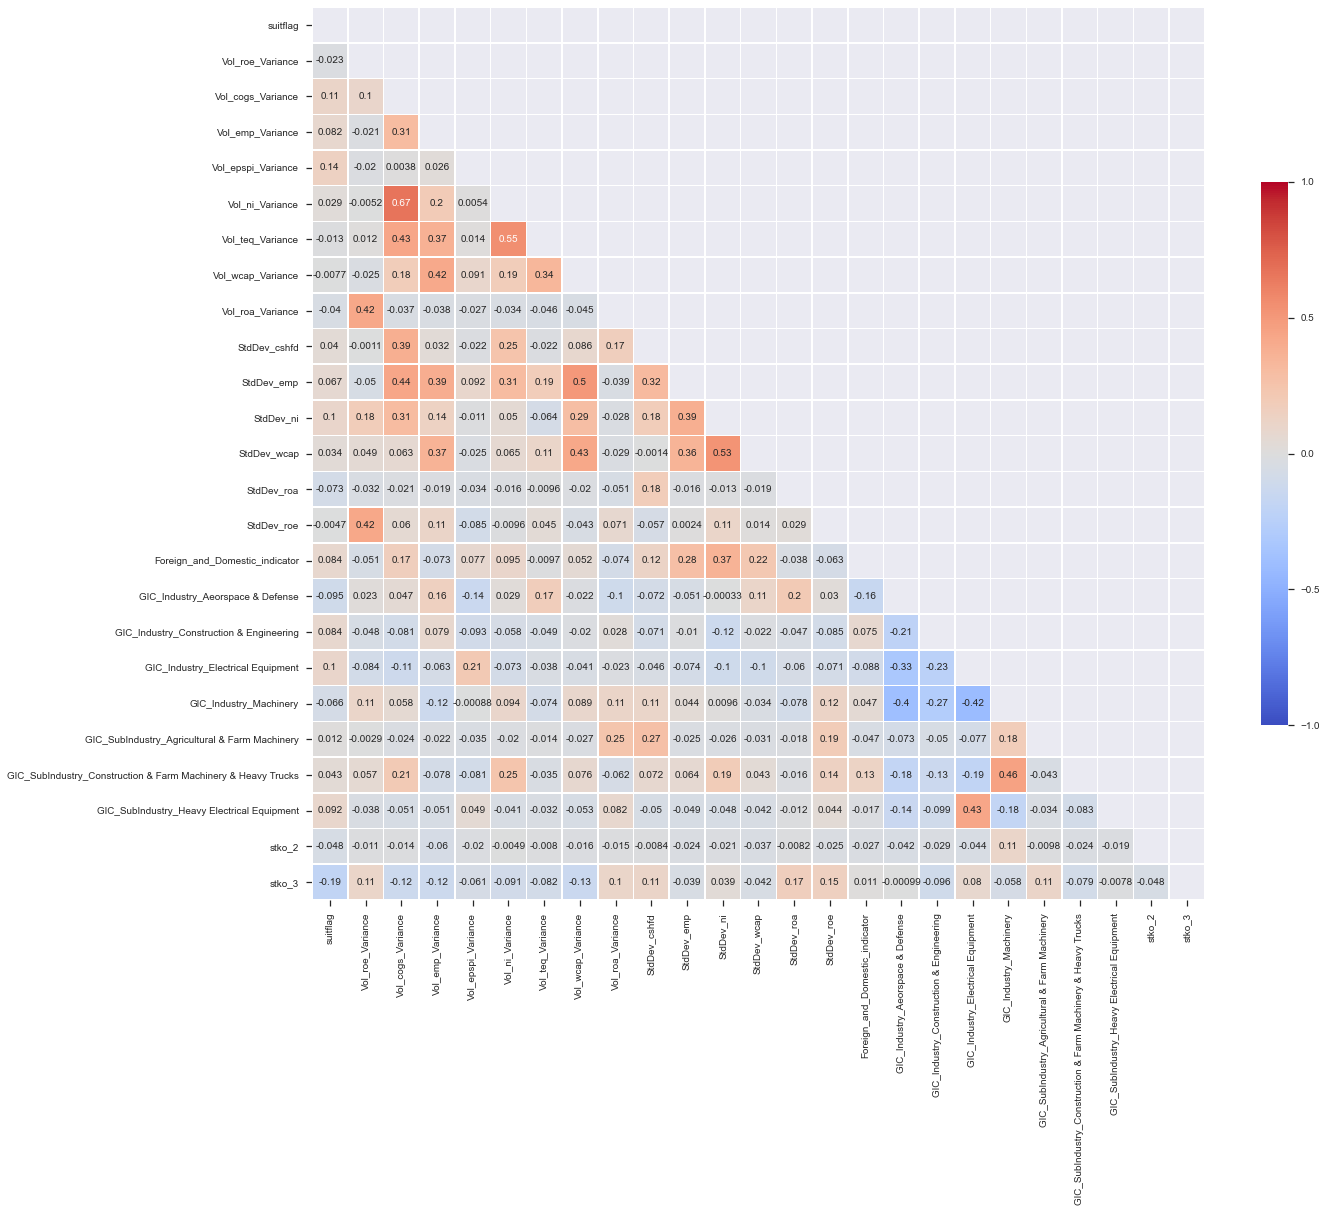

In [27]:
corr_matrix = df2.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(20, 20))

sns.set(font_scale = .9)

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': 0.5,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10})


#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 26 columns):
suitflag                                                        178 non-null float64
restatementflag                                                 178 non-null object
Vol_roe_Variance                                                178 non-null float64
Vol_cogs_Variance                                               178 non-null float64
Vol_emp_Variance                                                178 non-null float64
Vol_epspi_Variance                                              178 non-null float64
Vol_ni_Variance                                                 178 non-null float64
Vol_teq_Variance                                                178 non-null float64
Vol_wcap_Variance                                               178 non-null float64
Vol_roa_Variance                                                178 non-null float64
StdDev_cshfd                                  

In [29]:
df2['restatementflag'] = df2['restatementflag'].astype(int)
df2['suitflag'] = df2['suitflag'].astype(int)

In [30]:
df2.drop(columns='restatementflag', inplace=True)

In [31]:
#Review the columns with null values in the dataset
nulls = pd.DataFrame(df2.isnull().sum().sort_values(ascending = False), columns=['Amount'])
nulls = nulls.loc[nulls['Amount'] > 0]
# print('Shape of train dataset:', train.shape, '\nMissing values for train dataset below:\n', nulls)
nulls = pd.DataFrame(nulls.loc[nulls['Amount'] > 0])
# print('Shape of train dataset:', train.shape, '\nMissing values for train dataset below:\n', nulls)
nulls.index.name='Columns With Missing Values'
nulls

,Amount
Columns With Missing Values,
StdDev_wcap,16
StdDev_emp,16
StdDev_roe,16
StdDev_roa,16
StdDev_cshfd,16
StdDev_ni,16


In [32]:
df2.fillna(0, inplace=True)

In [33]:
#Review the columns with null values in the dataset
nulls = pd.DataFrame(df2.isnull().sum().sort_values(ascending = False), columns=['Amount'])
nulls = nulls.loc[nulls['Amount'] > 0]
# print('Shape of train dataset:', train.shape, '\nMissing values for train dataset below:\n', nulls)
nulls = pd.DataFrame(nulls.loc[nulls['Amount'] > 0])
# print('Shape of train dataset:', train.shape, '\nMissing values for train dataset below:\n', nulls)
nulls.index.name='Columns With Missing Values'
nulls

,Amount
Columns With Missing Values,


In [34]:
df2.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
suitflag,178.00,0.29,0.46,0.00,0.00,0.00,1.00,1.00
Vol_roe_Variance,178.00,0.09,0.38,0.00,0.03,0.03,0.03,3.00
Vol_cogs_Variance,178.00,0.18,0.44,0.01,0.10,0.10,0.10,3.00
Vol_emp_Variance,178.00,0.45,0.53,0.00,0.29,0.35,0.36,3.00
Vol_epspi_Variance,178.00,0.25,0.52,0.01,0.11,0.11,0.11,3.00
Vol_ni_Variance,178.00,0.13,0.38,0.00,0.07,0.07,0.07,3.00
Vol_teq_Variance,178.00,0.12,0.23,0.01,0.09,0.09,0.09,3.00
Vol_wcap_Variance,178.00,0.20,0.39,0.01,0.12,0.12,0.12,3.00
Vol_roa_Variance,178.00,0.17,0.47,0.02,0.08,0.08,0.08,3.00
StdDev_cshfd,178.00,0.31,0.43,0.00,0.17,0.27,0.29,3.00


## Split the Dataset

In [35]:
x = df2.drop(columns=['suitflag'])

y = df2[['suitflag']] 

In [36]:
# 0.42 test_size has pulled best results so far
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                   test_size=0.42,
                                                   random_state=16,
                                                   stratify=y)

print('X_train shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)

X_train shape:  (103, 24)
y_train.shape:  (103, 1)
X_test.shape:  (75, 24)


## Model

First model with decent results:

'suitflag', 'Vol_roe_Variance', 'Vol_cogs_Variance', 'Vol_emp_Variance', 'Vol_epspi_Variance', 'Vol_ni_Variance', 'Vol_teq_Variance', 'Vol_wcap_Variance', 'Vol_roa_Variance', 'StdDev_cshfd', 'StdDev_emp', 'StdDev_ni', 'StdDev_wcap', 'StdDev_roa', 'StdDev_roe', 'Foreign_and_Domestic_indicator', 'GIC_Industry_Aeorspace & Defense', 'GIC_Industry_Construction & Engineering', 'GIC_Industry_Electrical Equipment', 'GIC_Industry_Machinery', 'GIC_SubIndustry_Agricultural & Farm Machinery', 'GIC_SubIndustry_Construction & Farm Machinery & Heavy Trucks', 'GIC_SubIndustry_Heavy Electrical Equipment', 'stko_2', 'stko_3'

In [37]:
df2.columns

Index(['suitflag', 'Vol_roe_Variance', 'Vol_cogs_Variance', 'Vol_emp_Variance', 'Vol_epspi_Variance', 'Vol_ni_Variance', 'Vol_teq_Variance', 'Vol_wcap_Variance', 'Vol_roa_Variance', 'StdDev_cshfd', 'StdDev_emp', 'StdDev_ni', 'StdDev_wcap', 'StdDev_roa', 'StdDev_roe', 'Foreign_and_Domestic_indicator', 'GIC_Industry_Aeorspace & Defense', 'GIC_Industry_Construction & Engineering', 'GIC_Industry_Electrical Equipment', 'GIC_Industry_Machinery', 'GIC_SubIndustry_Agricultural & Farm Machinery', 'GIC_SubIndustry_Construction & Farm Machinery & Heavy Trucks', 'GIC_SubIndustry_Heavy Electrical Equipment', 'stko_2', 'stko_3'], dtype='object')

In [38]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), 
               family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               suitflag   No. Observations:                  103
Model:                            GLM   Df Residuals:                       78
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39.031
Date:                Tue, 12 Oct 2021   Deviance:                       78.061
Time:                        23:46:17   Pearson chi2:                     156.
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

In [39]:
Significant variables:
    Vol_roe_Variance
    Vol_cogs_Variance
    Vol_epspi_Variance
    Vol_ni_Variance
    Vol_roa_Variance
    StdDev_roa
    GIC_SubIndustry_Heavy Electrical Equipment

SyntaxError: invalid syntax (<ipython-input-39-2863d9fa5a58>, line 1)

In [ ]:
logistic_regression1 = LogisticRegression(n_jobs=-1, random_state=15)
logistic_regression1.fit(X_train, y_train)

acc_logistic_regression1 = round(logistic_regression1.score(X_test, y_test) * 100, 2)
prec_logistic_regression1 = round(precision_score(y_pred=logistic_regression1.predict(X_test), y_true=y_test)* 100, 2)
recall_logistic_regression1 = round(recall_score(y_pred=logistic_regression1.predict(X_test), y_true=y_test)* 100, 2)
f1_logistic_regression1 = round(f1_score(y_pred=logistic_regression1.predict(X_test), y_true=y_test)* 100, 2)

print_score(logistic_regression1, X_train, y_train, X_test, y_test, train=True)
print_score(logistic_regression1, X_train, y_train, X_test, y_test, train=False)

res_1 = cross_val_score(logistic_regression1, X_train, y_train, scoring = 'accuracy', cv = 10)

## Confusion Matrix

In [ ]:
# The confusion matrix
sns.set(font_scale = 1.5)
logistic_regression_cm = confusion_matrix(y_test, 
                                          logistic_regression1.predict(X_test))
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logistic_regression_cm, 
            annot=True, 
            linewidth=0.7, 
            linecolor='black', 
            fmt='g', 
            ax=ax, 
            cmap="BuPu")
plt.title('Logistic Regression - Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [ ]:
probs = logistic_regression1.predict_proba(X_test)
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<b>Review: </b>There are a total of 4 variables that are significant. Below are the variables to select when re-running the model:

    Vol_roe_Variance
    Vol_cogs_Variance
    Vol_epspi_Variance
    Vol_ni_Variance
    Vol_roa_Variance
    StdDev_roa
    GIC_SubIndustry_Heavy Electrical Equipment


# Logistic Regression - Second Run

In [ ]:
sig_variables = ['suitflag', 'Vol_roe_Variance', 'Vol_cogs_Variance', 'Vol_epspi_Variance', 'Vol_ni_Variance', 'Vol_roa_Variance','StdDev_roa', 'GIC_SubIndustry_Heavy Electrical Equipment']
df3 = df2[sig_variables]

## Review Data Correlations

In [ ]:
corr_matrix = df3.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(20, 20))

sns.set(font_scale = 1.3)

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True)


#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [ ]:
# Output any correlated values over 0.65 - isolating high-correlated variables to remove from the analysis
def high_corr_and_check(X):
    corr_matrix = X.corr().abs()
    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), 
                                     k=1).astype(np.bool))
                      .stack()
                      .sort_values(ascending=False))
    for index, value in sol.items():
        if value > 0.65:
            print(index,value)
            
high_corr_and_check(df3)

<b>Action: </b>There are no highly correlated variables I believe would help the analysis to remove.

In [ ]:
df3.info()

## Split the Dataset

In [ ]:
x = df3.drop(columns='suitflag')

y = df3[['suitflag']] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                   test_size=0.40,
                                                   random_state=16,
                                                   stratify=y)

print('X_train shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)

## Model

In [ ]:
# Logistic regression model
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), 
               family = sm.families.Binomial())
print(logm2.fit().summary())

In [ ]:
logistic_regression2 = LogisticRegression(n_jobs=-1, random_state=15)
logistic_regression2.fit(X_train, y_train)

acc_logistic_regression2 = round(logistic_regression2.score(X_test, y_test) * 100, 2)
prec_logistic_regression2 = round(precision_score(y_pred=logistic_regression2.predict(X_test), y_true=y_test)* 100, 2)
recall_logistic_regression2 = round(recall_score(y_pred=logistic_regression2.predict(X_test), y_true=y_test)* 100, 2)
f1_logistic_regression2 = round(f1_score(y_pred=logistic_regression2.predict(X_test), y_true=y_test)* 100, 2)

print_score(logistic_regression2, X_train, y_train, X_test, y_test, train=True)
print_score(logistic_regression2, X_train, y_train, X_test, y_test, train=False)

res_2 = cross_val_score(logistic_regression2, X_train, y_train, scoring = 'accuracy', cv = 10)

## Confusion Matrix

In [ ]:
# The confusion matrix
sns.set(font_scale = 1.5)
logistic_regression_cm = confusion_matrix(y_test, 
                                          logistic_regression2.predict(X_test))
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logistic_regression_cm, 
            annot=True, 
            linewidth=0.7, 
            linecolor='black', 
            fmt='g', 
            ax=ax, 
            cmap="BuPu")
plt.title('Logistic Regression - Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [ ]:
probs = logistic_regression2.predict_proba(X_test)
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<b>Review: </b>After a second model run, I am going to drop the following columns and re-run:

1) TotalCharges - negative coef
2) MultipleLines_Yes - now insignificant p-value
3) OnlineSecurity_Yes - now insignificant p-value
4) OnlineBackup_Yes - now insignificant p-value
5) TechSupport_Yes - now insignificant p-value

# Logistic Regression - Third Run

In [ ]:
sig_variables = ['suitflag', 'Vol_roe_Variance', 'Vol_cogs_Variance', 'Vol_epspi_Variance', 'Vol_ni_Variance', 'Vol_roa_Variance','StdDev_roa', 'GIC_SubIndustry_Heavy Electrical Equipment']
df3 = df2[sig_variables]

In [ ]:
df4 = df3.drop(columns=['Vol_roe_Variance',
                        'Vol_epspi_Variance', 
                        'Vol_ni_Variance',
                        'Vol_roa_Variance'])

## Review Data Correlations

In [ ]:
corr_matrix = df4.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(20, 20))

sns.set(font_scale = 1.3)

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True)


#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [ ]:
# Output any correlated values over 0.65 - isolating high-correlated variables to remove from the analysis
def high_corr_and_check(X):
    corr_matrix = X.corr().abs()
    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), 
                                     k=1).astype(np.bool))
                      .stack()
                      .sort_values(ascending=False))
    for index, value in sol.items():
        if value > 0.65:
            print(index,value)
            
high_corr_and_check(df4)

<b>Action: </b>There are no highly correlated variables I believe would help the analysis to remove.

In [ ]:
df4.info()

## Split the Dataset

In [ ]:
x = df4.drop(columns='suitflag')

y = df4[['suitflag']] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                   test_size=0.60,
                                                   random_state=16,
                                                   stratify=y)

print('X_train shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)

## Model

In [ ]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train)

logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), 
               family = sm.families.Binomial())
print(logm3.fit().summary())

res = logm3.fit()

In [ ]:
logistic_regression3 = LogisticRegression(n_jobs=-1, random_state=15)
logistic_regression3.fit(X_train, y_train)

acc_logistic_regression3 = round(logistic_regression3.score(X_test, y_test) * 100, 2)
prec_logistic_regression3 = round(precision_score(y_pred=logistic_regression3.predict(X_test), y_true=y_test)* 100, 2)
recall_logistic_regression3 = round(recall_score(y_pred=logistic_regression3.predict(X_test), y_true=y_test)* 100, 2)
f1_logistic_regression3 = round(f1_score(y_pred=logistic_regression3.predict(X_test), y_true=y_test)* 100, 2)

print_score(logistic_regression3, X_train, y_train, X_test, y_test, train=True)
print_score(logistic_regression3, X_train, y_train, X_test, y_test, train=False)

res_3 = cross_val_score(logistic_regression3, X_train, y_train, scoring = 'accuracy', cv = 10)

## Confusion Matrix

In [ ]:
# The confusion matrix
sns.set(font_scale = 1.5)
logistic_regression_cm = confusion_matrix(y_test, 
                                          logistic_regression3.predict(X_test))
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logistic_regression_cm, 
            annot=True, 
            linewidth=0.7, 
            linecolor='black', 
            fmt='g', 
            ax=ax, 
            cmap="BuPu")
plt.title('Logistic Regression - Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

<b>Review: </b>After a second model run, I am going to drop the following columns and re-run:

1) SeniorCitizen - now insignificant p-value
2) DeviceProtection_No - now insignificant p-value
3) DeviceProtection_Yes - negative coef
4) StreamingMovies_Yes - now insignificant p-value

In [ ]:
probs = logistic_regression3.predict_proba(X_test)
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Logistic Regression - Forth Run

In [ ]:
df5 = df4.drop(columns=['GIC_SubIndustry_Heavy Electrical Equipment'])

## Review Data Correlations

In [ ]:
corr_matrix = df5.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(20, 20))

sns.set(font_scale = 1.3)

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True)


#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [ ]:
# Output any correlated values over 0.65 - isolating high-correlated variables to remove from the analysis
def high_corr_and_check(X):
    corr_matrix = X.corr().abs()
    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), 
                                     k=1).astype(np.bool))
                      .stack()
                      .sort_values(ascending=False))
    for index, value in sol.items():
        if value > 0.65:
            print(index,value)
            
high_corr_and_check(df5)

<b>Action: </b>There are no highly correlated variables I believe would help the analysis to remove.

In [ ]:
df5.info()

## Split the Dataset

In [ ]:
x = df5.drop(columns='suitflag')

y = df5[['suitflag']] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                   test_size=0.40,
                                                   random_state=16,
                                                   stratify=y)

print('X_train shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)

## Model

In [ ]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train)

logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), 
               family = sm.families.Binomial())
print(logm4.fit().summary())

res = logm4.fit()



In [ ]:
logistic_regression4 = LogisticRegression(n_jobs=-1, random_state=15)
logistic_regression4.fit(X_train, y_train)

acc_logistic_regression4 = round(logistic_regression4.score(X_test, y_test) * 100, 2)
prec_logistic_regression4 = round(precision_score(y_pred=logistic_regression4.predict(X_test), y_true=y_test)* 100, 2)
recall_logistic_regression4 = round(recall_score(y_pred=logistic_regression4.predict(X_test), y_true=y_test)* 100, 2)
f1_logistic_regression4 = round(f1_score(y_pred=logistic_regression4.predict(X_test), y_true=y_test)* 100, 2)

print_score(logistic_regression4, X_train, y_train, X_test, y_test, train=True)
print_score(logistic_regression4, X_train, y_train, X_test, y_test, train=False)

res_4 = cross_val_score(logistic_regression4, X_train, y_train, scoring = 'accuracy', cv = 10)

## Confusion Matrix

In [ ]:
# The confusion matrix
sns.set(font_scale = 1.5)
logistic_regression_cm = confusion_matrix(y_test, 
                                          logistic_regression4.predict(X_test))
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logistic_regression_cm, 
            annot=True, 
            linewidth=0.7, 
            linecolor='black', 
            fmt='g', 
            ax=ax, 
            cmap="BuPu")
plt.title('Logistic Regression - Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [ ]:
probs = logistic_regression4.predict_proba(X_test)
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model Evaluation

In [ ]:
# Create a list which contains classifiers 
classifiers = []
classifiers.append(logistic_regression1)
classifiers.append(logistic_regression2)
classifiers.append(logistic_regression3)
classifiers.append(logistic_regression4)
print('Number of Classifiers: ',len(classifiers))

# Number of Cross Validations
cv = 10
print('Number of Cross Validations: ', cv, '\n','-'*40)

# Create a list which contains cross validation results for each classifier
cv_results = []
cv_results.append(res_1)
cv_results.append(res_2)
cv_results.append(res_3)
cv_results.append(res_4)

# for classifier in classifiers:
#     cv_results.append(cross_val_score(classifier, X_train, y_train, scoring = 'accuracy', cv = 10))
    
# Mean and standard deviation of cross validation results for each classifier  
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(round(cv_result.mean()*100,2))
    cv_std.append(round(cv_result.std(),4))

algos = ['Logistic Regression - Initial Run',
         'Logistic Regression - Second Run',
         'Logistic Regression - Third Run',
         'Logistic Regression - Forth Run'
        ]

acc_scores = [acc_logistic_regression1,
              acc_logistic_regression2,
              acc_logistic_regression3,
              acc_logistic_regression4
             ]

prec_scores = [prec_logistic_regression1,
               prec_logistic_regression2,
               prec_logistic_regression3,
               prec_logistic_regression4
              ]

recall_scores = [recall_logistic_regression1,
                 recall_logistic_regression2,
                 recall_logistic_regression3,
                 recall_logistic_regression4
                ]

f1_scores = [f1_logistic_regression1,
             f1_logistic_regression2,
             f1_logistic_regression3,
             f1_logistic_regression4
            ]

    
cv_res = pd.DataFrame({'Algorithm': algos,
                       'Initial Accuracy Scores': acc_scores,
                       'Cross Validation Mean': cv_mean, 
                       'Cross Validation Std': cv_std,
                       'Precision Score': prec_scores,
                       'Recall Scores': recall_scores,
                       'F1 Scores': f1_scores
                       })

cv_res.sort_values(by = 'F1 Scores', ascending = False).set_index('Algorithm')

In [ ]:
cv_res1 = cv_res.drop(columns='Cross Validation Std').set_index('Algorithm').T
sns.set(font_scale = 1.8)
fig, ax = plt.subplots(figsize=(24,8))
cv_res1.plot(kind='bar', ax=ax)
plt.xticks(rotation = 45)
plt.ylabel('Percent')
plt.legend(loc='top right')
ax.grid();

## Visualize F1 Scores to Identify the Best Model

In [ ]:
sns.barplot('F1 Scores', 
            'Algorithm', 
            data = cv_res, 
            order = cv_res.sort_values(by = 'F1 Scores', 
                                       ascending = False)['Algorithm'], 
            palette = 'Set3', 
            **{'xerr': cv_std})

plt.ylabel('Algorithm')
plt.title('F1 Scores')

## Receiver Operating Characteristic Curve

In [ ]:
probs = logistic_regression4.predict_proba(X_test)
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Combine Prediction Results to Test Dataset

In [ ]:
x

In [ ]:
Y_pred = logistic_regression4.predict_proba(x)[:, 1]
Y_pred

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

In [ ]:
print('The number of customers in this prediction is: ' ,len(Y_pred))

In [ ]:
submit = pd.DataFrame({'index': df['index'], 'Churn_Pred': Y_pred})
submit = submit[['Churn_Pred']]
submit

In [ ]:
df = df.join(submit)
df.drop(columns='index', inplace=True)
df

In [ ]:
df['Churn']

In [ ]:
df['Prediction_Score'] = round(df['Churn_Pred']*100, -1)
pd.value_counts(df['Prediction_Score'], dropna=False)

In [ ]:
df.hist('Churn_Pred', bins=15)

In [ ]:
plt.figure(figsize = (40,20))
sns.set(font_scale = 2.5)


var = df['Prediction_Score']
sns.countplot(x = var,
            data = df)

plt.ylabel('Customer Count')
plt.title('Customer Count by Prediction Score')
plt.xticks(rotation = 45)
    

# Model Interpretation

In [ ]:
model  = pd.DataFrame({"Features": X_train_sm.columns,"Coefficient":res.params.values})
model["Odds_Ratio"] = model["Coefficient"].apply(lambda x: np.exp(x))
model[["Coefficient","Odds_Ratio"]] = model[["Coefficient","Odds_Ratio"]].apply(lambda x: round(x,2))
model["Perc_Impact"] = model["Odds_Ratio"].apply(lambda x: (x-1)*100)
model.sort_values(by='Odds_Ratio', ascending=False)

In [ ]:
model_int = model.drop(columns=['Perc_Impact', 'Coefficient']).set_index('Features').T
model_int= model_int[['Contract_Month-to-month',
                      'InternetService_Fiber optic',
                      'OnlineBackup_No',
                      'OnlineSecurity_No',  
                      'TechSupport_No',
                      'PaperlessBilling', 
                      'PaymentMethod_Electronic check',
                      'const']]

sns.set(font_scale = 1.8)
fig, ax = plt.subplots(figsize=(16,8))
model_int.plot(kind='bar', ax=ax)
plt.xticks(rotation = 45)
plt.ylabel('Percent')
plt.legend(loc='top right')
ax.grid();

# END